In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import initializers
from keras.callbacks import ReduceLROnPlateau


Tasks To be done

4.1 gradient-based saliency map (sensitivity analysis)

- Run a batch of inputs through the trained model.

Wrap this in a GradientTape where you watch the input batch.
(batch size can be 1 if you just like to produce a single saliency map)
Compute the gradient for a particular logit or its softmax output with respect to the input.

- This tells us how a change in each input pixel would affect the class output.

- This already gives you a batch of gradient-based saliency maps!

- Plot the saliency map next to the original image or superimpose it.

- Do the saliency maps seem to make sense? How would you interpret them?

In [ ]:
mnist = tf.keras.datasets.cifar10
(raw_train_images, raw_train_labels), (raw_test_images, raw_test_labels) = mnist.load_data()

In [ ]:
train_images = tf.cast(raw_train_images.astype(np.float32)/255.0,dtype="float32")
print(train_images.shape)

test_images = tf.cast(raw_test_images.astype(np.float32)/255.0,dtype="float32")
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
train_labels= tf.convert_to_tensor(raw_train_labels, dtype=tf.float32)
test_labels = tf.convert_to_tensor(raw_test_labels, dtype=tf.float32)

In [ ]:
type(test_labels)

tensorflow.python.framework.ops.EagerTensor

[0 1 2 3 4 5 6 7 8 9]


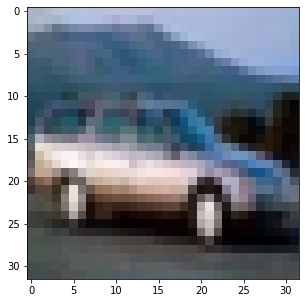

In [ ]:
plt.imshow(raw_train_images[4], cmap="Greys_r")
print(np.unique(raw_train_labels))

In [ ]:
train_images.shape

TensorShape([50000, 32, 32, 3])

In [ ]:
test_images.shape

TensorShape([10000, 32, 32, 3])

In [ ]:
class_names= ['Airplane', 'Automobile', 'Bird', 'Cat',
                  'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

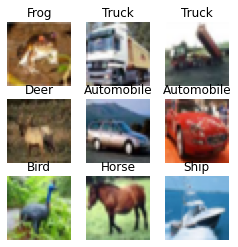

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(raw_train_images[i])
    plt.title(class_names[np.ndarray.item(raw_train_labels[i])])
    plt.axis("off")

In [ ]:
input_shape = train_images[0].shape

reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=2, min_lr=0.001)

model_1 = tf.keras.applications.DenseNet121(include_top=True, weights=None,input_tensor=None,input_shape=input_shape,
    pooling='max',
    classes=10)

model_1.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

model_1.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=20, callbacks= [reduce_lr], use_multiprocessing=True)

Epoch 1/20
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5503 - accuracy: 0.4447 - val_loss: 2.7626 - val_accuracy: 0.3179
Epoch 2/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1414 - accuracy: 0.6014 - val_loss: 1.3651 - val_accuracy: 0.5279
Epoch 3/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9447 - accuracy: 0.6721 - val_loss: 1.3619 - val_accuracy: 0.5902
Epoch 4/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8407 - accuracy: 0.7103 - val_loss: 0.9729 - val_accuracy: 0.6619
Epoch 5/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7049 - accuracy: 0.7576 - val_loss: 1.0069 - val_accuracy: 0.6570
Epoch 6/20
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6828 - accuracy: 0.7662 - val_loss: 0.7816 - val_accuracy: 0.7308
Epoch 7/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5694 - accuracy: 0.8029 - val_loss: 0.8321 -

In [ ]:
train_labels1= tf.convert_to_tensor(raw_train_labels, dtype=tf.int32)
test_labels1 = tf.convert_to_tensor(raw_test_labels, dtype=tf.int32)

In [ ]:
input_shape = train_images[0].shape

reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=2, min_lr=0.001)

model_2 = tf.keras.applications.DenseNet121(include_top=True, weights=None,input_tensor=None,input_shape=input_shape,
    pooling='max',
    classes=10)

model_2.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

model_2.fit(train_images,train_labels1,validation_data=(test_images,test_labels1),epochs=20, callbacks= [reduce_lr], use_multiprocessing=True)

Epoch 1/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5276 - accuracy: 0.4597 - val_loss: 2.4165 - val_accuracy: 0.3894
Epoch 2/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1645 - accuracy: 0.5917 - val_loss: 1.8038 - val_accuracy: 0.4398
Epoch 3/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9979 - accuracy: 0.6534 - val_loss: 1.1251 - val_accuracy: 0.6029
Epoch 4/20
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8307 - accuracy: 0.7131 - val_loss: 1.1162 - val_accuracy: 0.6339
Epoch 5/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7302 - accuracy: 0.7477 - val_loss: 0.8837 - val_accuracy: 0.6969
Epoch 6/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6190 - accuracy: 0.7849 - val_loss: 0.9054 - val_accuracy: 0.6951
Epoch 7/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5540 - accuracy: 0.8084 - val_loss: 0.8222 -

In [ ]:
type(train_images)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
type(train_labels)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
type(test_images)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
type(test_labels)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
model_1.save("/content/model_introspection")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/model_introspection/assets


In [ ]:
!zip -r model_introspection.zip /content/model_introspection

  adding: content/model_introspection/ (stored 0%)
  adding: content/model_introspection/saved_model.pb (deflated 93%)
  adding: content/model_introspection/variables/ (stored 0%)
  adding: content/model_introspection/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: content/model_introspection/variables/variables.index (deflated 81%)
  adding: content/model_introspection/assets/ (stored 0%)


In [ ]:
model_1.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

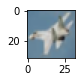

In [ ]:
plt.figure(figsize=(3, 3))
introspection_image = raw_test_images[10, :, :, :]
ax = plt.subplot(3, 3, 0 + 1)
plt.imshow(introspection_image,cmap='Greys_r')

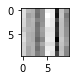

In [ ]:
plt.figure(figsize=(3, 3))
ax = plt.subplot(3, 3, 0 + 1)
introspection_prediction = model.predict(raw_test_images[0:10, :, :, :])
plt.imshow(introspection_prediction, cmap="Greys_r",)

In [ ]:
msk = tf.tile(tf.Variable(initial_value=tf.constant([1,0,0,0,0,0,0,0,0,0], dtype="float32", shape=(1,10))) , multiples=[10000,1])

In [ ]:

#for test_label,test_image in zip(test_labels,test_images):
with tf.GradientTape() as tape:
  tape.watch(test_images)
  tape.watch(test_labels)
  prediction = model(test_images)
  print(prediction.shape)
  masked_output = []
  masked_loss = []

  # We need to find the loss only wrt one logits, hence set all the other logits output to zero by multiplying with binary mask
  #for msk in mask_list:
  masked_output.append(tf.multiply(msk, prediction))
    
  #Not used anywhere, just there for simple cross check
  complete_loss = tf.keras.losses.sparse_categorical_crossentropy(test_labels, prediction)
    
  #masked loss corresponding to the each masked output
  for msk_op in masked_output:
    masked_loss.append(tf.keras.losses.sparse_categorical_crossentropy(test_labels, msk_op)) 
masked_grads = []    
for msk_loss in masked_loss:
      masked_grads.append(tape.gradient(msk_loss,test_images))



(10000, 10)


In [ ]:
states=(train_labels.numpy()==0).tolist()
np.where(states)[0]

array([   29,    30,    35, ..., 49941, 49992, 49994])

In [ ]:
masked_grads[0].shape

TensorShape([10000, 32, 32, 3])

In [ ]:
masked_grads[0][2,:,:,:]

In [ ]:
def plot_figures(introspection_testing_images, masked_grads, num_images=25):
  x_subplots = tf.math.sqrt(tf.constant(num_images, dtype = tf.float32))
  plt.figure(figsize=(10,10))
  j = -1
  header="Header"
  for i in range(0, num_images):
      plt.subplot(6, 6,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      j = j + 1
      if(i % 2 == 0):  
        plt.imshow(test_images[i], cmap="Greys_r")
        header= class_names[np.ndarray.item(raw_test_labels[i])]

        #print(i)
      elif(j%2 == 1):      
        plt.imshow(tf.nn.relu(masked_grads[0][j-1, :, :, 0]), cmap="Greys_r") 
      plt.title(header)
        #print(j-1)
      
      #plt.xlabel(class_names[test_images[i]])
  plt.show()

**Activations for class 0:AirPlane**

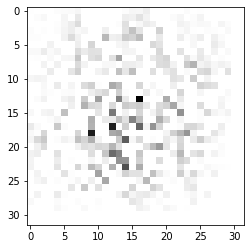

In [ ]:
plt.imshow(tf.nn.relu(masked_grads[0][10,:,:,0]), cmap = "binary")

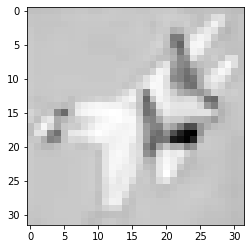

In [ ]:
plt.imshow(test_images[10,:,:,2], cmap = "Greys_r")

**Plot the saliency map next to the original image or superimpose it.**

Do the saliency maps seem to make sense? How would you interpret them?
   
Saliency map generated when mask is defined for **class-0: Airplane.**
*   We can see most of neurons get fired when applied this mask are the image surface. 
*   with bare eyes we can say directly facing dog,cat,truck,ship nuerons get fired.

**Note:** may be we can train model again on the masked_grads and see how may classes get correctly classified. 

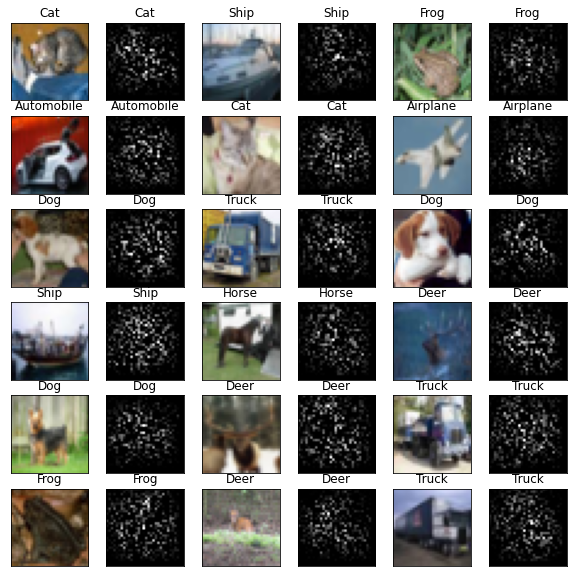

In [ ]:
plot_figures(test_images, masked_grads, num_images=36)

4.2 Activation Maximization

Extend the code from 4.1 to create an optimal input for a particular class.

- Add the gradients (i.e. the saliency map) to the input. You should multiply the gradients with a small constant (like a learning rate) to make sure the inputs aren’t changed too much.

- Do multiple update steps to make the input more optimal for the chosen output class.
(I recommend implementing your own update step, but you are allowed to use a keras training loop to optimize the input.)

- Does the resulting input look natural?

- How does the inputs change when applying many steps of optimization?

- How do the optimal inputs differ when initializing the optimization with random noise instead of real examples?

Bonus: Apply regularization strategies to make the optimal input more natural-looking.


In [ ]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (5, 5)
mpl.rcParams['axes.grid'] = False

In [ ]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

In [ ]:
image = preprocess(raw_train_images[0])
image_probs = model_2.predict(image)

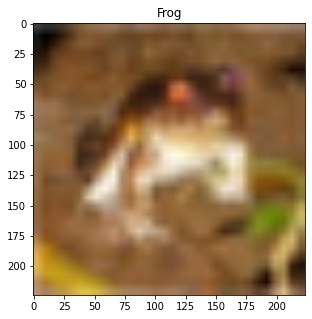

In [ ]:
plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
image_class=class_names[np.ndarray.item(raw_train_labels[0])]
plt.title(image_class)
plt.show()

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model_2(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [ ]:
label=train_labels1[0]

In [ ]:
label = tf.one_hot(label, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))
label

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)>

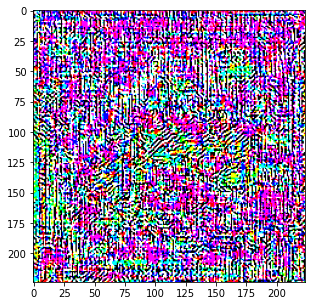

In [ ]:
perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_patterns(input_images, input_labels):
  
  with tf.GradientTape() as tape:
    tape.watch(input_images)
    prediction = model_1(input_images)
    loss = loss_object(input_labels, predictions)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_images)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

**Does the resulting input look natural?**
No it doesnot look natural
**How does the inputs change when applying many steps of optimization?**
We can see the changes for airplane class how images look and the changes repsectively
**How do the optimal inputs differ when initializing the optimization with random noise instead of real examples?**

Actual: [6] Predicted: [6.] and iterations are: 0
Actual: [9] Predicted: [3.] and iterations are: 0
Actual: [9] Predicted: [7.] and iterations are: 0
Actual: [4] Predicted: [3.] and iterations are: 0
Actual: [1] Predicted: [1.] and iterations are: 0
Actual: [1] Predicted: [1.] and iterations are: 0
Actual: [2] Predicted: [3.] and iterations are: 0
Actual: [7] Predicted: [1.] and iterations are: 0
Actual: [8] Predicted: [1.] and iterations are: 0
Actual: [3] Predicted: [1.] and iterations are: 0
Actual: [4] Predicted: [3.] and iterations are: 0
Actual: [7] Predicted: [1.] and iterations are: 0
Actual: [7] Predicted: [1.] and iterations are: 0
Actual: [2] Predicted: [3.] and iterations are: 0
Actual: [9] Predicted: [3.] and iterations are: 0
Actual: [9] Predicted: [1.] and iterations are: 0
Actual: [9] Predicted: [1.] and iterations are: 0
Actual: [3] Predicted: [3.] and iterations are: 0
Actual: [2] Predicted: [1.] and iterations are: 0
Actual: [6] Predicted: [6.] and iterations are: 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 0
Actual: [6] Predicted: [6.] and iterations are: 1
Actual: [9] Predicted: [3.] and iterations are: 1
Actual: [9] Predicted: [7.] and iterations are: 1
Actual: [4] Predicted: [3.] and iterations are: 1
Actual: [1] Predicted: [1.] and iterations are: 1
Actual: [1] Predicted: [1.] and iterations are: 1
Actual: [2] Predicted: [3.] and iterations are: 1
Actual: [7] Predicted: [1.] and iterations are: 1
Actual: [8] Predicted: [1.] and iterations are: 1
Actual: [3] Predicted: [1.] and iterations are: 1
Actual: [4] Predicted: [3.] and iterations are: 1
Actual: [7] Predicted: [1.] and iterations are: 1
Actual: [7] Predicted: [1.] and iterations are: 1
Actual: [2] Predicted: [3.] and iterations are: 1
Actual: [9] Predicted: [3.] and iterations are: 1
Actual: [9] Predicted: [1.] and iterations are: 1
Actual: [9] Predicted: [1.] and iterations are: 1
Actual: [3] Predicted: [3.] and iterations are: 1
Actual: [2] Predicted: [1.] and iterations are: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 1
Actual: [6] Predicted: [6.] and iterations are: 2
Actual: [9] Predicted: [3.] and iterations are: 2
Actual: [9] Predicted: [7.] and iterations are: 2
Actual: [4] Predicted: [3.] and iterations are: 2
Actual: [1] Predicted: [1.] and iterations are: 2
Actual: [1] Predicted: [1.] and iterations are: 2
Actual: [2] Predicted: [3.] and iterations are: 2
Actual: [7] Predicted: [1.] and iterations are: 2
Actual: [8] Predicted: [1.] and iterations are: 2
Actual: [3] Predicted: [1.] and iterations are: 2
Actual: [4] Predicted: [3.] and iterations are: 2
Actual: [7] Predicted: [1.] and iterations are: 2
Actual: [7] Predicted: [1.] and iterations are: 2
Actual: [2] Predicted: [3.] and iterations are: 2
Actual: [9] Predicted: [3.] and iterations are: 2
Actual: [9] Predicted: [1.] and iterations are: 2
Actual: [9] Predicted: [1.] and iterations are: 2
Actual: [3] Predicted: [3.] and iterations are: 2
Actual: [2] Predicted: [1.] and iterations are: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 2
Actual: [6] Predicted: [6.] and iterations are: 3
Actual: [9] Predicted: [3.] and iterations are: 3
Actual: [9] Predicted: [7.] and iterations are: 3
Actual: [4] Predicted: [3.] and iterations are: 3
Actual: [1] Predicted: [1.] and iterations are: 3
Actual: [1] Predicted: [1.] and iterations are: 3
Actual: [2] Predicted: [3.] and iterations are: 3
Actual: [7] Predicted: [1.] and iterations are: 3
Actual: [8] Predicted: [1.] and iterations are: 3
Actual: [3] Predicted: [1.] and iterations are: 3
Actual: [4] Predicted: [3.] and iterations are: 3
Actual: [7] Predicted: [1.] and iterations are: 3
Actual: [7] Predicted: [1.] and iterations are: 3
Actual: [2] Predicted: [3.] and iterations are: 3
Actual: [9] Predicted: [3.] and iterations are: 3
Actual: [9] Predicted: [1.] and iterations are: 3
Actual: [9] Predicted: [1.] and iterations are: 3
Actual: [3] Predicted: [3.] and iterations are: 3
Actual: [2] Predicted: [1.] and iterations are: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 3
Actual: [6] Predicted: [6.] and iterations are: 4
Actual: [9] Predicted: [3.] and iterations are: 4
Actual: [9] Predicted: [7.] and iterations are: 4
Actual: [4] Predicted: [3.] and iterations are: 4
Actual: [1] Predicted: [1.] and iterations are: 4
Actual: [1] Predicted: [1.] and iterations are: 4
Actual: [2] Predicted: [3.] and iterations are: 4
Actual: [7] Predicted: [1.] and iterations are: 4
Actual: [8] Predicted: [1.] and iterations are: 4
Actual: [3] Predicted: [1.] and iterations are: 4
Actual: [4] Predicted: [3.] and iterations are: 4
Actual: [7] Predicted: [1.] and iterations are: 4
Actual: [7] Predicted: [1.] and iterations are: 4
Actual: [2] Predicted: [3.] and iterations are: 4
Actual: [9] Predicted: [3.] and iterations are: 4
Actual: [9] Predicted: [1.] and iterations are: 4
Actual: [9] Predicted: [1.] and iterations are: 4
Actual: [3] Predicted: [3.] and iterations are: 4
Actual: [2] Predicted: [1.] and iterations are: 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 4
Actual: [6] Predicted: [6.] and iterations are: 5
Actual: [9] Predicted: [3.] and iterations are: 5
Actual: [9] Predicted: [7.] and iterations are: 5
Actual: [4] Predicted: [3.] and iterations are: 5
Actual: [1] Predicted: [1.] and iterations are: 5
Actual: [1] Predicted: [1.] and iterations are: 5
Actual: [2] Predicted: [3.] and iterations are: 5
Actual: [7] Predicted: [1.] and iterations are: 5
Actual: [8] Predicted: [1.] and iterations are: 5
Actual: [3] Predicted: [1.] and iterations are: 5
Actual: [4] Predicted: [3.] and iterations are: 5
Actual: [7] Predicted: [1.] and iterations are: 5
Actual: [7] Predicted: [1.] and iterations are: 5
Actual: [2] Predicted: [3.] and iterations are: 5
Actual: [9] Predicted: [3.] and iterations are: 5
Actual: [9] Predicted: [1.] and iterations are: 5
Actual: [9] Predicted: [1.] and iterations are: 5
Actual: [3] Predicted: [3.] and iterations are: 5
Actual: [2] Predicted: [1.] and iterations are: 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 5
Actual: [6] Predicted: [6.] and iterations are: 6
Actual: [9] Predicted: [3.] and iterations are: 6
Actual: [9] Predicted: [7.] and iterations are: 6
Actual: [4] Predicted: [3.] and iterations are: 6
Actual: [1] Predicted: [1.] and iterations are: 6
Actual: [1] Predicted: [1.] and iterations are: 6
Actual: [2] Predicted: [3.] and iterations are: 6
Actual: [7] Predicted: [1.] and iterations are: 6
Actual: [8] Predicted: [1.] and iterations are: 6
Actual: [3] Predicted: [1.] and iterations are: 6
Actual: [4] Predicted: [3.] and iterations are: 6
Actual: [7] Predicted: [1.] and iterations are: 6
Actual: [7] Predicted: [1.] and iterations are: 6
Actual: [2] Predicted: [3.] and iterations are: 6
Actual: [9] Predicted: [3.] and iterations are: 6
Actual: [9] Predicted: [1.] and iterations are: 6
Actual: [9] Predicted: [1.] and iterations are: 6
Actual: [3] Predicted: [3.] and iterations are: 6
Actual: [2] Predicted: [1.] and iterations are: 6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 6
Actual: [6] Predicted: [6.] and iterations are: 7
Actual: [9] Predicted: [3.] and iterations are: 7
Actual: [9] Predicted: [7.] and iterations are: 7
Actual: [4] Predicted: [3.] and iterations are: 7
Actual: [1] Predicted: [1.] and iterations are: 7
Actual: [1] Predicted: [1.] and iterations are: 7
Actual: [2] Predicted: [3.] and iterations are: 7
Actual: [7] Predicted: [1.] and iterations are: 7
Actual: [8] Predicted: [1.] and iterations are: 7
Actual: [3] Predicted: [1.] and iterations are: 7
Actual: [4] Predicted: [3.] and iterations are: 7
Actual: [7] Predicted: [1.] and iterations are: 7
Actual: [7] Predicted: [1.] and iterations are: 7
Actual: [2] Predicted: [3.] and iterations are: 7
Actual: [9] Predicted: [3.] and iterations are: 7
Actual: [9] Predicted: [1.] and iterations are: 7
Actual: [9] Predicted: [1.] and iterations are: 7
Actual: [3] Predicted: [3.] and iterations are: 7
Actual: [2] Predicted: [1.] and iterations are: 7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 7
Actual: [6] Predicted: [6.] and iterations are: 8
Actual: [9] Predicted: [3.] and iterations are: 8
Actual: [9] Predicted: [7.] and iterations are: 8
Actual: [4] Predicted: [3.] and iterations are: 8
Actual: [1] Predicted: [1.] and iterations are: 8
Actual: [1] Predicted: [1.] and iterations are: 8
Actual: [2] Predicted: [3.] and iterations are: 8
Actual: [7] Predicted: [1.] and iterations are: 8
Actual: [8] Predicted: [1.] and iterations are: 8
Actual: [3] Predicted: [1.] and iterations are: 8
Actual: [4] Predicted: [3.] and iterations are: 8
Actual: [7] Predicted: [1.] and iterations are: 8
Actual: [7] Predicted: [1.] and iterations are: 8
Actual: [2] Predicted: [3.] and iterations are: 8
Actual: [9] Predicted: [3.] and iterations are: 8
Actual: [9] Predicted: [1.] and iterations are: 8
Actual: [9] Predicted: [1.] and iterations are: 8
Actual: [3] Predicted: [3.] and iterations are: 8
Actual: [2] Predicted: [1.] and iterations are: 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 8
Actual: [6] Predicted: [6.] and iterations are: 9
Actual: [9] Predicted: [3.] and iterations are: 9
Actual: [9] Predicted: [7.] and iterations are: 9
Actual: [4] Predicted: [3.] and iterations are: 9
Actual: [1] Predicted: [1.] and iterations are: 9
Actual: [1] Predicted: [1.] and iterations are: 9
Actual: [2] Predicted: [3.] and iterations are: 9
Actual: [7] Predicted: [1.] and iterations are: 9
Actual: [8] Predicted: [1.] and iterations are: 9
Actual: [3] Predicted: [1.] and iterations are: 9
Actual: [4] Predicted: [3.] and iterations are: 9
Actual: [7] Predicted: [1.] and iterations are: 9
Actual: [7] Predicted: [1.] and iterations are: 9
Actual: [2] Predicted: [3.] and iterations are: 9
Actual: [9] Predicted: [3.] and iterations are: 9
Actual: [9] Predicted: [1.] and iterations are: 9
Actual: [9] Predicted: [1.] and iterations are: 9
Actual: [3] Predicted: [3.] and iterations are: 9
Actual: [2] Predicted: [1.] and iterations are: 9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 9
Actual: [6] Predicted: [6.] and iterations are: 10
Actual: [9] Predicted: [3.] and iterations are: 10
Actual: [9] Predicted: [7.] and iterations are: 10
Actual: [4] Predicted: [3.] and iterations are: 10
Actual: [1] Predicted: [1.] and iterations are: 10
Actual: [1] Predicted: [1.] and iterations are: 10
Actual: [2] Predicted: [3.] and iterations are: 10
Actual: [7] Predicted: [1.] and iterations are: 10
Actual: [8] Predicted: [1.] and iterations are: 10
Actual: [3] Predicted: [1.] and iterations are: 10
Actual: [4] Predicted: [3.] and iterations are: 10
Actual: [7] Predicted: [1.] and iterations are: 10
Actual: [7] Predicted: [1.] and iterations are: 10
Actual: [2] Predicted: [3.] and iterations are: 10
Actual: [9] Predicted: [3.] and iterations are: 10
Actual: [9] Predicted: [1.] and iterations are: 10
Actual: [9] Predicted: [1.] and iterations are: 10
Actual: [3] Predicted: [3.] and iterations are: 10
Actual: [2] Predicted: [1.] and 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 10
Actual: [6] Predicted: [6.] and iterations are: 11
Actual: [9] Predicted: [3.] and iterations are: 11
Actual: [9] Predicted: [7.] and iterations are: 11
Actual: [4] Predicted: [3.] and iterations are: 11
Actual: [1] Predicted: [1.] and iterations are: 11
Actual: [1] Predicted: [1.] and iterations are: 11
Actual: [2] Predicted: [3.] and iterations are: 11
Actual: [7] Predicted: [1.] and iterations are: 11
Actual: [8] Predicted: [1.] and iterations are: 11
Actual: [3] Predicted: [1.] and iterations are: 11
Actual: [4] Predicted: [3.] and iterations are: 11
Actual: [7] Predicted: [1.] and iterations are: 11
Actual: [7] Predicted: [1.] and iterations are: 11
Actual: [2] Predicted: [3.] and iterations are: 11
Actual: [9] Predicted: [3.] and iterations are: 11
Actual: [9] Predicted: [1.] and iterations are: 11
Actual: [9] Predicted: [1.] and iterations are: 11
Actual: [3] Predicted: [3.] and iterations are: 11
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 11
Actual: [6] Predicted: [6.] and iterations are: 12
Actual: [9] Predicted: [3.] and iterations are: 12
Actual: [9] Predicted: [7.] and iterations are: 12
Actual: [4] Predicted: [3.] and iterations are: 12
Actual: [1] Predicted: [1.] and iterations are: 12
Actual: [1] Predicted: [1.] and iterations are: 12
Actual: [2] Predicted: [3.] and iterations are: 12
Actual: [7] Predicted: [1.] and iterations are: 12
Actual: [8] Predicted: [1.] and iterations are: 12
Actual: [3] Predicted: [1.] and iterations are: 12
Actual: [4] Predicted: [3.] and iterations are: 12
Actual: [7] Predicted: [1.] and iterations are: 12
Actual: [7] Predicted: [1.] and iterations are: 12
Actual: [2] Predicted: [3.] and iterations are: 12
Actual: [9] Predicted: [3.] and iterations are: 12
Actual: [9] Predicted: [1.] and iterations are: 12
Actual: [9] Predicted: [1.] and iterations are: 12
Actual: [3] Predicted: [3.] and iterations are: 12
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 12
Actual: [6] Predicted: [6.] and iterations are: 13
Actual: [9] Predicted: [3.] and iterations are: 13
Actual: [9] Predicted: [7.] and iterations are: 13
Actual: [4] Predicted: [3.] and iterations are: 13
Actual: [1] Predicted: [1.] and iterations are: 13
Actual: [1] Predicted: [1.] and iterations are: 13
Actual: [2] Predicted: [3.] and iterations are: 13
Actual: [7] Predicted: [1.] and iterations are: 13
Actual: [8] Predicted: [1.] and iterations are: 13
Actual: [3] Predicted: [1.] and iterations are: 13
Actual: [4] Predicted: [3.] and iterations are: 13
Actual: [7] Predicted: [1.] and iterations are: 13
Actual: [7] Predicted: [1.] and iterations are: 13
Actual: [2] Predicted: [3.] and iterations are: 13
Actual: [9] Predicted: [3.] and iterations are: 13
Actual: [9] Predicted: [1.] and iterations are: 13
Actual: [9] Predicted: [1.] and iterations are: 13
Actual: [3] Predicted: [3.] and iterations are: 13
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 13
Actual: [6] Predicted: [6.] and iterations are: 14
Actual: [9] Predicted: [3.] and iterations are: 14
Actual: [9] Predicted: [7.] and iterations are: 14
Actual: [4] Predicted: [3.] and iterations are: 14
Actual: [1] Predicted: [1.] and iterations are: 14
Actual: [1] Predicted: [1.] and iterations are: 14
Actual: [2] Predicted: [3.] and iterations are: 14
Actual: [7] Predicted: [1.] and iterations are: 14
Actual: [8] Predicted: [1.] and iterations are: 14
Actual: [3] Predicted: [1.] and iterations are: 14
Actual: [4] Predicted: [3.] and iterations are: 14
Actual: [7] Predicted: [1.] and iterations are: 14
Actual: [7] Predicted: [1.] and iterations are: 14
Actual: [2] Predicted: [3.] and iterations are: 14
Actual: [9] Predicted: [3.] and iterations are: 14
Actual: [9] Predicted: [1.] and iterations are: 14
Actual: [9] Predicted: [1.] and iterations are: 14
Actual: [3] Predicted: [3.] and iterations are: 14
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 14
Actual: [6] Predicted: [6.] and iterations are: 15
Actual: [9] Predicted: [3.] and iterations are: 15
Actual: [9] Predicted: [7.] and iterations are: 15
Actual: [4] Predicted: [3.] and iterations are: 15
Actual: [1] Predicted: [1.] and iterations are: 15
Actual: [1] Predicted: [1.] and iterations are: 15
Actual: [2] Predicted: [3.] and iterations are: 15
Actual: [7] Predicted: [1.] and iterations are: 15
Actual: [8] Predicted: [1.] and iterations are: 15
Actual: [3] Predicted: [1.] and iterations are: 15
Actual: [4] Predicted: [3.] and iterations are: 15
Actual: [7] Predicted: [1.] and iterations are: 15
Actual: [7] Predicted: [1.] and iterations are: 15
Actual: [2] Predicted: [3.] and iterations are: 15
Actual: [9] Predicted: [3.] and iterations are: 15
Actual: [9] Predicted: [1.] and iterations are: 15
Actual: [9] Predicted: [1.] and iterations are: 15
Actual: [3] Predicted: [3.] and iterations are: 15
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 15
Actual: [6] Predicted: [6.] and iterations are: 16
Actual: [9] Predicted: [3.] and iterations are: 16
Actual: [9] Predicted: [7.] and iterations are: 16
Actual: [4] Predicted: [3.] and iterations are: 16
Actual: [1] Predicted: [1.] and iterations are: 16
Actual: [1] Predicted: [1.] and iterations are: 16
Actual: [2] Predicted: [3.] and iterations are: 16
Actual: [7] Predicted: [1.] and iterations are: 16
Actual: [8] Predicted: [1.] and iterations are: 16
Actual: [3] Predicted: [1.] and iterations are: 16
Actual: [4] Predicted: [3.] and iterations are: 16
Actual: [7] Predicted: [1.] and iterations are: 16
Actual: [7] Predicted: [1.] and iterations are: 16
Actual: [2] Predicted: [3.] and iterations are: 16
Actual: [9] Predicted: [3.] and iterations are: 16
Actual: [9] Predicted: [1.] and iterations are: 16
Actual: [9] Predicted: [1.] and iterations are: 16
Actual: [3] Predicted: [3.] and iterations are: 16
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 16
Actual: [6] Predicted: [6.] and iterations are: 17
Actual: [9] Predicted: [3.] and iterations are: 17
Actual: [9] Predicted: [7.] and iterations are: 17
Actual: [4] Predicted: [3.] and iterations are: 17
Actual: [1] Predicted: [1.] and iterations are: 17
Actual: [1] Predicted: [1.] and iterations are: 17
Actual: [2] Predicted: [3.] and iterations are: 17
Actual: [7] Predicted: [1.] and iterations are: 17
Actual: [8] Predicted: [1.] and iterations are: 17
Actual: [3] Predicted: [1.] and iterations are: 17
Actual: [4] Predicted: [3.] and iterations are: 17
Actual: [7] Predicted: [1.] and iterations are: 17
Actual: [7] Predicted: [1.] and iterations are: 17
Actual: [2] Predicted: [3.] and iterations are: 17
Actual: [9] Predicted: [3.] and iterations are: 17
Actual: [9] Predicted: [1.] and iterations are: 17
Actual: [9] Predicted: [1.] and iterations are: 17
Actual: [3] Predicted: [3.] and iterations are: 17
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 17
Actual: [6] Predicted: [6.] and iterations are: 18
Actual: [9] Predicted: [3.] and iterations are: 18
Actual: [9] Predicted: [7.] and iterations are: 18
Actual: [4] Predicted: [3.] and iterations are: 18
Actual: [1] Predicted: [1.] and iterations are: 18
Actual: [1] Predicted: [1.] and iterations are: 18
Actual: [2] Predicted: [3.] and iterations are: 18
Actual: [7] Predicted: [1.] and iterations are: 18
Actual: [8] Predicted: [1.] and iterations are: 18
Actual: [3] Predicted: [1.] and iterations are: 18
Actual: [4] Predicted: [3.] and iterations are: 18
Actual: [7] Predicted: [1.] and iterations are: 18
Actual: [7] Predicted: [1.] and iterations are: 18
Actual: [2] Predicted: [3.] and iterations are: 18
Actual: [9] Predicted: [3.] and iterations are: 18
Actual: [9] Predicted: [1.] and iterations are: 18
Actual: [9] Predicted: [1.] and iterations are: 18
Actual: [3] Predicted: [3.] and iterations are: 18
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 18
Actual: [6] Predicted: [6.] and iterations are: 19
Actual: [9] Predicted: [3.] and iterations are: 19
Actual: [9] Predicted: [7.] and iterations are: 19
Actual: [4] Predicted: [3.] and iterations are: 19
Actual: [1] Predicted: [1.] and iterations are: 19
Actual: [1] Predicted: [1.] and iterations are: 19
Actual: [2] Predicted: [3.] and iterations are: 19
Actual: [7] Predicted: [1.] and iterations are: 19
Actual: [8] Predicted: [1.] and iterations are: 19
Actual: [3] Predicted: [1.] and iterations are: 19
Actual: [4] Predicted: [3.] and iterations are: 19
Actual: [7] Predicted: [1.] and iterations are: 19
Actual: [7] Predicted: [1.] and iterations are: 19
Actual: [2] Predicted: [3.] and iterations are: 19
Actual: [9] Predicted: [3.] and iterations are: 19
Actual: [9] Predicted: [1.] and iterations are: 19
Actual: [9] Predicted: [1.] and iterations are: 19
Actual: [3] Predicted: [3.] and iterations are: 19
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 19
Actual: [6] Predicted: [6.] and iterations are: 20
Actual: [9] Predicted: [3.] and iterations are: 20
Actual: [9] Predicted: [7.] and iterations are: 20
Actual: [4] Predicted: [3.] and iterations are: 20
Actual: [1] Predicted: [1.] and iterations are: 20
Actual: [1] Predicted: [1.] and iterations are: 20
Actual: [2] Predicted: [3.] and iterations are: 20
Actual: [7] Predicted: [1.] and iterations are: 20
Actual: [8] Predicted: [1.] and iterations are: 20
Actual: [3] Predicted: [1.] and iterations are: 20
Actual: [4] Predicted: [3.] and iterations are: 20
Actual: [7] Predicted: [1.] and iterations are: 20
Actual: [7] Predicted: [1.] and iterations are: 20
Actual: [2] Predicted: [3.] and iterations are: 20
Actual: [9] Predicted: [3.] and iterations are: 20
Actual: [9] Predicted: [1.] and iterations are: 20
Actual: [9] Predicted: [1.] and iterations are: 20
Actual: [3] Predicted: [3.] and iterations are: 20
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 20
Actual: [6] Predicted: [6.] and iterations are: 21
Actual: [9] Predicted: [3.] and iterations are: 21
Actual: [9] Predicted: [7.] and iterations are: 21
Actual: [4] Predicted: [3.] and iterations are: 21
Actual: [1] Predicted: [1.] and iterations are: 21
Actual: [1] Predicted: [1.] and iterations are: 21
Actual: [2] Predicted: [3.] and iterations are: 21
Actual: [7] Predicted: [1.] and iterations are: 21
Actual: [8] Predicted: [1.] and iterations are: 21
Actual: [3] Predicted: [1.] and iterations are: 21
Actual: [4] Predicted: [3.] and iterations are: 21
Actual: [7] Predicted: [1.] and iterations are: 21
Actual: [7] Predicted: [1.] and iterations are: 21
Actual: [2] Predicted: [3.] and iterations are: 21
Actual: [9] Predicted: [3.] and iterations are: 21
Actual: [9] Predicted: [1.] and iterations are: 21
Actual: [9] Predicted: [1.] and iterations are: 21
Actual: [3] Predicted: [3.] and iterations are: 21
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 21
Actual: [6] Predicted: [6.] and iterations are: 22
Actual: [9] Predicted: [3.] and iterations are: 22
Actual: [9] Predicted: [7.] and iterations are: 22
Actual: [4] Predicted: [3.] and iterations are: 22
Actual: [1] Predicted: [1.] and iterations are: 22
Actual: [1] Predicted: [1.] and iterations are: 22
Actual: [2] Predicted: [3.] and iterations are: 22
Actual: [7] Predicted: [1.] and iterations are: 22
Actual: [8] Predicted: [1.] and iterations are: 22
Actual: [3] Predicted: [1.] and iterations are: 22
Actual: [4] Predicted: [3.] and iterations are: 22
Actual: [7] Predicted: [1.] and iterations are: 22
Actual: [7] Predicted: [1.] and iterations are: 22
Actual: [2] Predicted: [3.] and iterations are: 22
Actual: [9] Predicted: [3.] and iterations are: 22
Actual: [9] Predicted: [1.] and iterations are: 22
Actual: [9] Predicted: [1.] and iterations are: 22
Actual: [3] Predicted: [3.] and iterations are: 22
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 22
Actual: [6] Predicted: [6.] and iterations are: 23
Actual: [9] Predicted: [3.] and iterations are: 23
Actual: [9] Predicted: [7.] and iterations are: 23
Actual: [4] Predicted: [3.] and iterations are: 23
Actual: [1] Predicted: [1.] and iterations are: 23
Actual: [1] Predicted: [1.] and iterations are: 23
Actual: [2] Predicted: [3.] and iterations are: 23
Actual: [7] Predicted: [1.] and iterations are: 23
Actual: [8] Predicted: [1.] and iterations are: 23
Actual: [3] Predicted: [1.] and iterations are: 23
Actual: [4] Predicted: [3.] and iterations are: 23
Actual: [7] Predicted: [1.] and iterations are: 23
Actual: [7] Predicted: [1.] and iterations are: 23
Actual: [2] Predicted: [3.] and iterations are: 23
Actual: [9] Predicted: [3.] and iterations are: 23
Actual: [9] Predicted: [1.] and iterations are: 23
Actual: [9] Predicted: [1.] and iterations are: 23
Actual: [3] Predicted: [3.] and iterations are: 23
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 23
Actual: [6] Predicted: [6.] and iterations are: 24
Actual: [9] Predicted: [3.] and iterations are: 24
Actual: [9] Predicted: [7.] and iterations are: 24
Actual: [4] Predicted: [3.] and iterations are: 24
Actual: [1] Predicted: [1.] and iterations are: 24
Actual: [1] Predicted: [1.] and iterations are: 24
Actual: [2] Predicted: [3.] and iterations are: 24
Actual: [7] Predicted: [1.] and iterations are: 24
Actual: [8] Predicted: [1.] and iterations are: 24
Actual: [3] Predicted: [1.] and iterations are: 24
Actual: [4] Predicted: [3.] and iterations are: 24
Actual: [7] Predicted: [1.] and iterations are: 24
Actual: [7] Predicted: [1.] and iterations are: 24
Actual: [2] Predicted: [3.] and iterations are: 24
Actual: [9] Predicted: [3.] and iterations are: 24
Actual: [9] Predicted: [1.] and iterations are: 24
Actual: [9] Predicted: [1.] and iterations are: 24
Actual: [3] Predicted: [3.] and iterations are: 24
Actual: [2] Predicted: [1.] and

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: [0] Predicted: [1.] and iterations are: 24


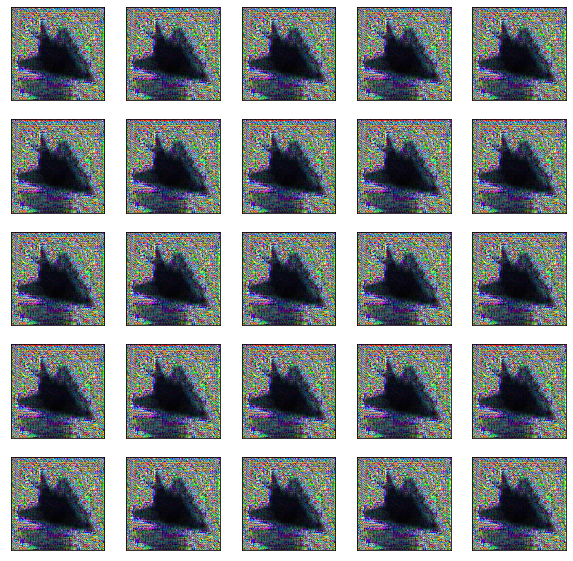

In [ ]:
modified_images=[]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    for j in range(30):
      label=train_labels1[j]
      label = tf.one_hot(label, image_probs.shape[-1])
      label = tf.reshape(label, (1, image_probs.shape[-1]))
      label

      perturbations = create_adversarial_pattern(preprocess(raw_train_images[j]), label)
      modified_image = tf.subtract(preprocess(raw_train_images[j]), 1 * perturbations)
      modified_predictions = model_2(modified_image)
      modified_predictions_2 =  tf.cast(tf.argmax(modified_predictions, axis=1),  dtype=tf.dtypes.float32)
      x = tf.equal(train_images[j], modified_predictions_2)
      print("Actual:",train_labels1[j].numpy() ,"Predicted:", modified_predictions_2.numpy(),"and iterations are:",i)
    plt.imshow(modified_image[0][:,:,], cmap='Greys_r')


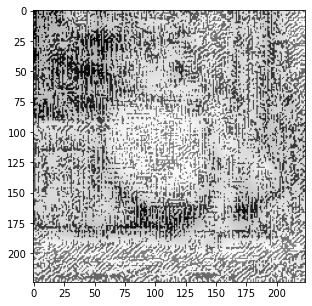

In [ ]:
plt.imshow(modified_image[0][:,:,1], cmap='Greys_r')